In [1]:
!pip install cptec-sazonal

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for cptec-sazonal: filename=cptec_sazonal-0.0.4-py3-none-any.whl size=7132 sha256=a5c140f2bb8779f7b7ba881669db16936ac2dfe4b4ab54fc6e21fbdbe02cee51
  Stored in directory: /home/jovyan/.cache/pip/wheels/2f/f5/c4/573478396c91e59bbd686b485171baf0baa64507a10c41d77e
Successfully built cptec-sazonal


In [6]:
# Importa a ferramenta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sazonal.CPTEC_SAZ as SAZ

import os
os.environ['PROJ_LIB'] = "/opt/conda/envs/geospatial/share/proj"

In [7]:

# Inicializa o construtor
saz = SAZ.model()

# Data Condição Inicial (IC)
date = '20250101'

# Variável
var = ['prec_ca']

# Produto
product = 'seas'

# Campo
field = 'anomalies'

# Requisição dos dados
f = saz.load(date=date, var=var, product=product ,field=field)

# Plotar a variável prec
f


#### The Brazilian Global Atmospheric Model (TQ0666L064 / Hybrid) #####

--------------------
Forecast data available for reading.

2024-01-01 - 2024-02-01 - 2024-03-01 - 2024-04-01 - 2024-05-01
2024-06-01 - 2024-07-01 - 2024-08-01 - 2024-09-01 - 2024-10-01
2024-11-01 - 2024-12-01 - 2025-01-01 - --------------------
Variables: ['prec', 'prec_ca', 't2mt', 't2mt_ca', 'psnm', 'role', 'tp85', 'zg50', 'uv85', 'uv20', 'vv85', 'vv20', 'cr85', 'cr20']
--------------------
Products: ['seas', 'mnth']
--------------------
Field: ['anomalies', 'prob_positve_anomaly', 'prob_terciles', 'totals']
--------------------


<xarray.Dataset> Size: 594kB
Dimensions:  (lat: 192, time: 2, lon: 384)
Coordinates:
  * lat      (lat) float64 2kB -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * time     (time) datetime64[ns] 16B 2025-01-01 2025-04-01
  * lon      (lon) float64 3kB -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1
Data variables:
    prec_ca  (time, lat, lon) float32 590kB nan nan nan nan ... nan nan nan nan
Attributes:
    center:          National Institute for Space Research - INPE
    model:           The Brazilian Global Atmospheric Model V1.2 (TQ0126L042 ...
    initialization:  2025-01-01
    field:           Forecast Anomalies


#### The Brazilian Global Atmospheric Model (TQ0666L064 / Hybrid) #####

--------------------
Forecast data available for reading.

2024-01-01 - 2024-02-01 - 2024-03-01 - 2024-04-01 - 2024-05-01
2024-06-01 - 2024-07-01 - 2024-08-01 - 2024-09-01 - 2024-10-01
2024-11-01 - 2024-12-01 - 2025-01-01 - --------------------
Variables: ['prec', 'prec_ca', 't2mt', 't2mt_ca', 'psnm', 'role', 'tp85', 'zg50', 'uv85', 'uv20', 'vv85', 'vv20', 'cr85', 'cr20']
--------------------
Products: ['seas', 'mnth']
--------------------
Field: ['anomalies', 'prob_positve_anomaly', 'prob_terciles', 'totals']
--------------------


/opt/conda/envs/geospatial/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


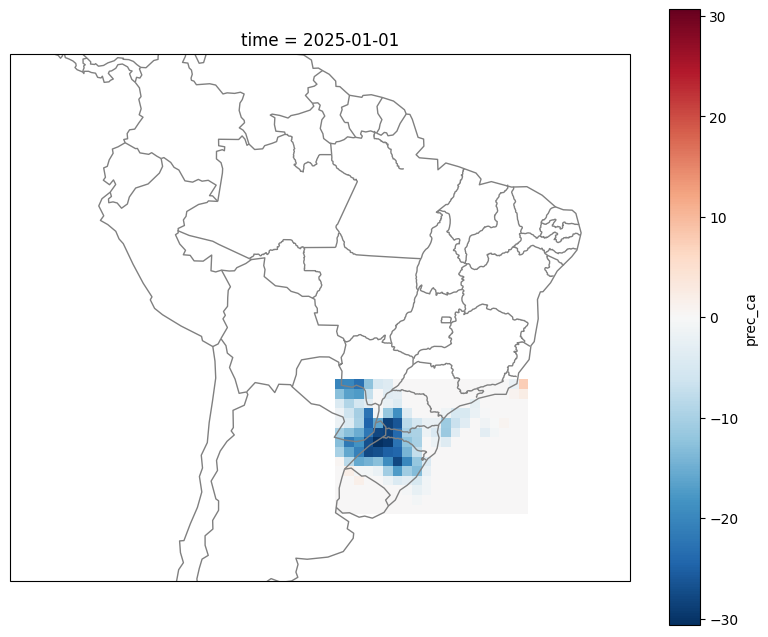

In [8]:
# Inicializa o construtor
saz = SAZ.model()
# Filtrar area definida
saz.dict['area']['reduce'] = True
saz.dict['area']['minlat'] = -34.44
saz.dict['area']['maxlat'] = -21.43
saz.dict['area']['minlon'] = 301.14
saz.dict['area']['maxlon'] = 320.57
# Requisição dos dados
f = saz.load(date='20250101', var='prec_ca', product='mnth' ,field='anomalies')
# Definir tamanho da figura
fig = plt.figure(figsize=(10,8))
# Setar figura unica
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# Colocar  Linhas de Borda dos paises e linhas costeiras
ax.add_feature(cfeature.COASTLINE,color='grey')
ax.add_feature(cfeature.BORDERS,color='grey')
# Definir Regiao do Brasil
ax.set_extent([-90,-30,10,-41], ccrs.PlateCarree())
# Setar estados do Brasil
states = cfeature.NaturalEarthFeature(category='cultural',
                                         name='admin_1_states_provinces_lines',
                                         scale='50m', facecolor='none')
# Colocar Estados Brasil
ax.add_feature(states, edgecolor='gray')
# Plotar variavel
f.prec_ca.sel(time="2025-01-01").plot()
plt.show()